In [1]:
import sys

# import from dirs below
sys.path.insert(0, "..")
sys.path.insert(0, "../src")
sys.path.insert(0, "../src/new_generation")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import random

from common.params import N, SEED
from graph_generation import generate_city_graph

from new_generation.Mutators import LineMutator, GenotypeMutator
from new_generation.SpecimenCrossers import GenotypeCrosser

## Symulacja

In [5]:
from SimultionEngine import SimulationEngine
from common.params import N_IN_POPULATION
from fitness import fitness
from initial_population import create_initial_population
from new_generation.new_generation_function import new_generation_random
from survival import n_best_survive


random.seed(SEED)

G, best_paths = generate_city_graph(N)

Population     0, best fitness function:          -121.456986, best lines stops count: Counter({10: 2, 3: 2, 16: 2, 20: 1, 13: 1, 5: 1, 18: 1})no of lines: 10


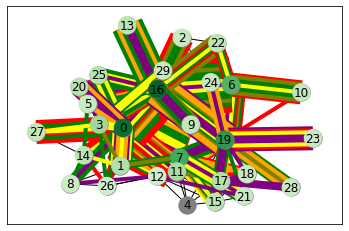

Population    20, best fitness function:            17.184443, best lines stops count: Counter({2: 5, 4: 2, 6: 1, 10: 1})no of lines: 9


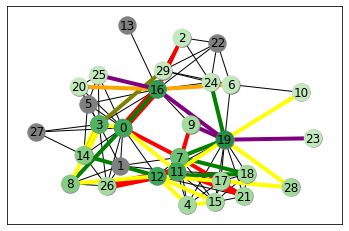

Population    40, best fitness function:            20.648105, best lines stops count: Counter({2: 7, 4: 2, 5: 1, 6: 1, 3: 1, 10: 1})no of lines: 13


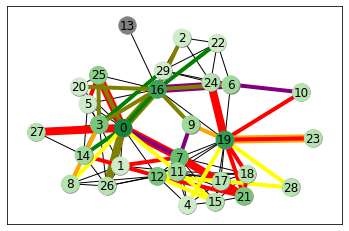

Population    60, best fitness function:            22.633485, best lines stops count: Counter({2: 8, 5: 1, 4: 1, 6: 1, 10: 1, 3: 1})no of lines: 13


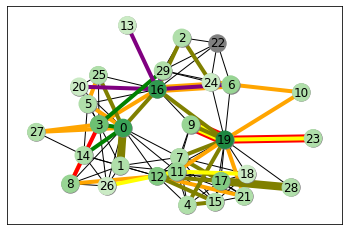

Population    80, best fitness function:            22.833019, best lines stops count: Counter({2: 11, 3: 2, 4: 1, 6: 1, 10: 1})no of lines: 16


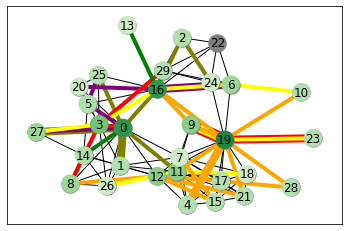

Population   100, best fitness function:            24.639152, best lines stops count: Counter({2: 8, 1: 2, 10: 1, 4: 1, 6: 1, 3: 1, 5: 1})no of lines: 15


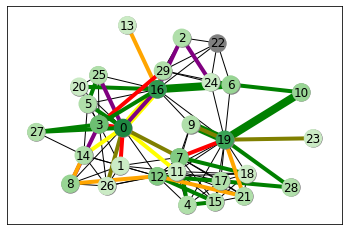

In [6]:
line_mutator = LineMutator(G, best_paths)
genotype_mutator = GenotypeMutator(G, best_paths)
genotype_crosser = GenotypeCrosser(best_paths)

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 5
    ),
    new_generation_function=lambda population, graph: new_generation_random(
        population,
        N_IN_POPULATION,
        line_mutator,
        genotype_mutator,
        genotype_crosser,
    ),
)

sim_engine.run(100, 20, reporbt_show=True)

Population     0, best fitness function:          -121.456986, best lines stops count: Counter({10: 2, 3: 2, 16: 2, 20: 1, 13: 1, 5: 1, 18: 1})no of lines: 10


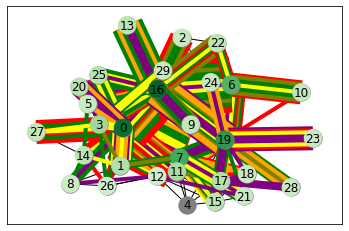

In [9]:
fitness = sim_engine.run(100, 0, report_show=True)

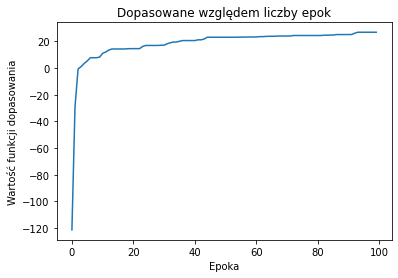

In [14]:
import matplotlib.pyplot as plt

plt.plot(list(range(100)), fitness)
plt.xlabel("Epoka")
plt.ylabel("Wartość funkcji dopasowania")
plt.title("Dopasowane względem liczby epok")
plt.show()

Population     0, best fitness function:          -102.641248, best lines stops count: Counter({14: 2, 10: 1, 9: 1, 19: 1, 7: 1, 17: 1, 18: 1, 6: 1, 5: 1})no of lines: 10


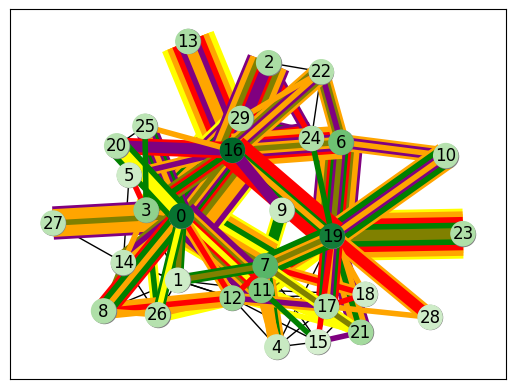

Population   250, best fitness function:            32.653626, best lines stops count: Counter({2: 8, 3: 5, 5: 3, 4: 1})no of lines: 17


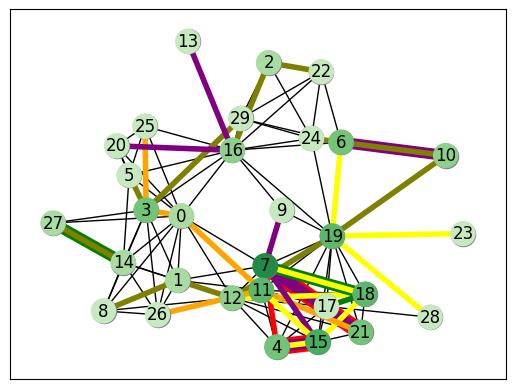

Population   500, best fitness function:            35.395363, best lines stops count: Counter({2: 9, 3: 5, 4: 2, 5: 2, 6: 1})no of lines: 19


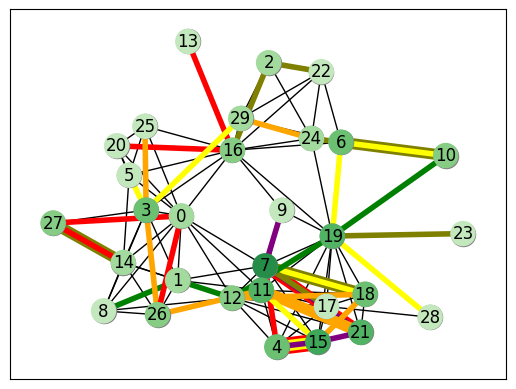

Population   750, best fitness function:            37.815310, best lines stops count: Counter({2: 7, 3: 6, 4: 4, 5: 2, 1: 1, 6: 1})no of lines: 21


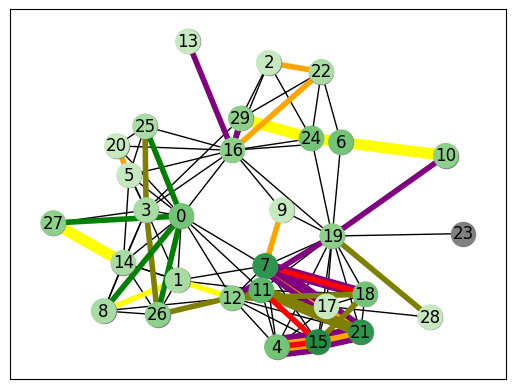

Population  1000, best fitness function:            39.060425, best lines stops count: Counter({2: 5, 3: 5, 4: 4, 1: 3, 5: 2, 6: 1})no of lines: 20


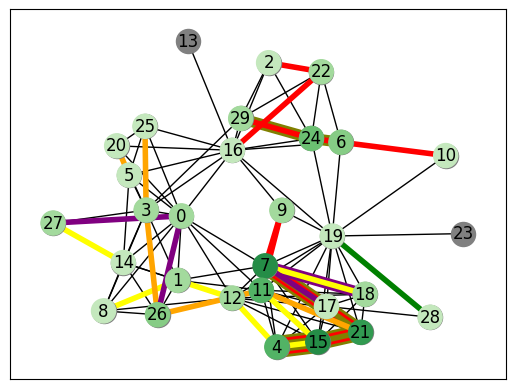

In [20]:
sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 5
    ),
    new_generation_function=lambda population, graph: new_generation_random(
        population,
        N_IN_POPULATION,
        line_mutator,
        genotype_mutator,
        genotype_crosser,
    ),
)

sim_engine.run(1000, 250, report_show=True)

Population     0, best fitness function:          -132.149300, best lines stops count: Counter({16: 2, 20: 2, 11: 1, 12: 1, 9: 1, 10: 1, 14: 1, 7: 1})no of lines: 10


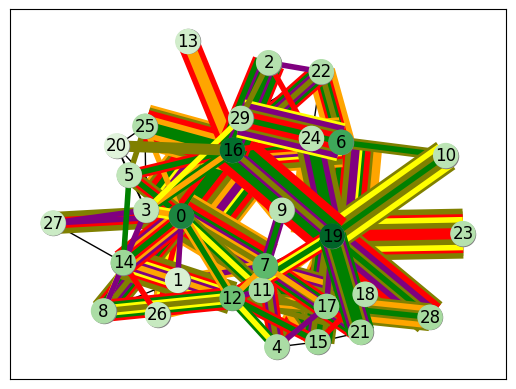

Population    50, best fitness function:            20.828135, best lines stops count: Counter({2: 4, 4: 3, 3: 1, 5: 1, 6: 1})no of lines: 10


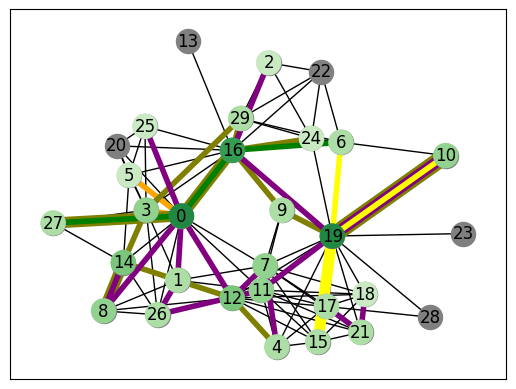

Population   100, best fitness function:            23.553222, best lines stops count: Counter({2: 5, 4: 2, 3: 1, 5: 1, 6: 1})no of lines: 10


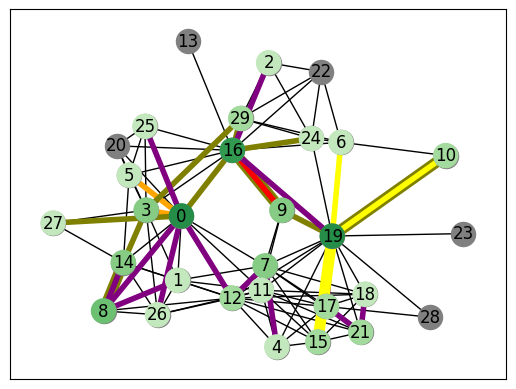

Population   150, best fitness function:            25.668097, best lines stops count: Counter({2: 4, 3: 3, 6: 1, 4: 1, 11: 1})no of lines: 10


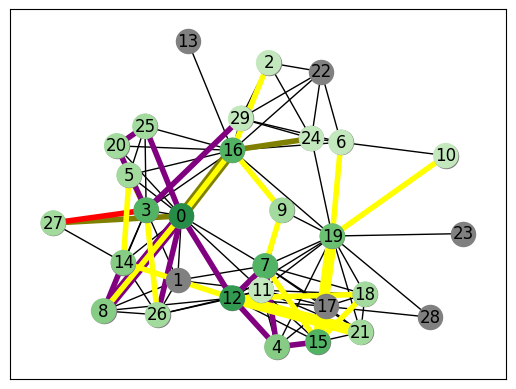

Population   200, best fitness function:            27.882238, best lines stops count: Counter({3: 3, 2: 2, 4: 2, 6: 1, 11: 1, 5: 1})no of lines: 10


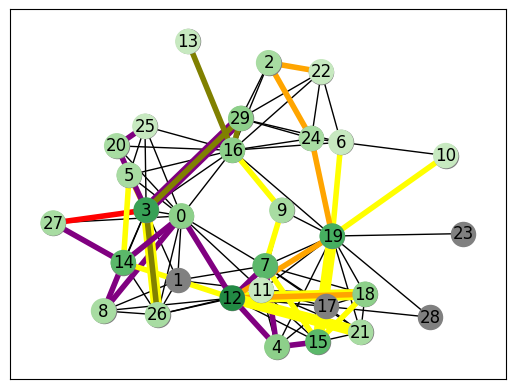

In [21]:
from new_generation.primite_new_generation import new_generation_replace_random_line

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 5
    ),
    new_generation_function=lambda population, graph: new_generation_replace_random_line(
        population, graph, N_IN_POPULATION, best_paths
    ),
)

sim_engine.run(200, 50, report_show=True)

In [25]:
# modify graph with one extreme outlier
print(G.graph["points"][13])
G.graph["points"][13] = 3
G.graph["points"][19] = 0

3.0


In [26]:
[(idx, node) for idx, node in enumerate(G.graph["points"])]

[(0, 0.9056042766903121),
 (1, 0.0772267932117432),
 (2, 0.27256975591863775),
 (3, 0.621850482246133),
 (4, 0.9340284082893642),
 (5, 0.08494678693877655),
 (6, 0.6292297667279622),
 (7, 0.7755717464742619),
 (8, 0.5114435121032097),
 (9, 0.7485077186625034),
 (10, 0.8804914776062093),
 (11, 0.49914664183094415),
 (12, 0.7949051162030177),
 (13, 3.0),
 (14, 0.7303591821397812),
 (15, 0.7729027325200477),
 (16, 0.06646993518474575),
 (17, 0.10505916153339656),
 (18, 0.39009466097852896),
 (19, 0.0),
 (20, 0.251685127586056),
 (21, 0.8429273246607937),
 (22, 0.007071461985793448),
 (23, 0.18110256670927205),
 (24, 0.6382935273795809),
 (25, 0.47875358318541394),
 (26, 0.5011405863368826),
 (27, 0.6809453329047943),
 (28, 0.055540426710343205),
 (29, 0.733826788364981)]

Population     0, best fitness function:           -91.061193, best lines stops count: Counter({19: 2, 10: 2, 9: 1, 7: 1, 13: 1, 15: 1, 6: 1, 8: 1})no of lines: 10


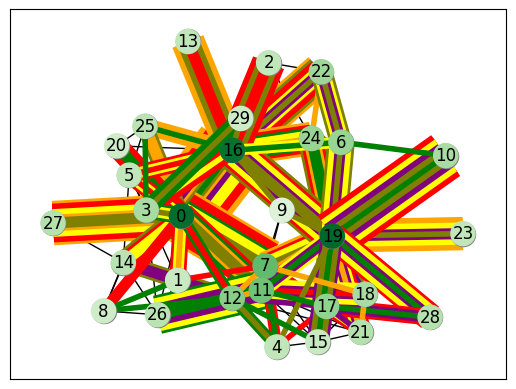

Population   250, best fitness function:            45.468490, best lines stops count: Counter({4: 7, 2: 3, 3: 3, 5: 2, 1: 1, 8: 1})no of lines: 17


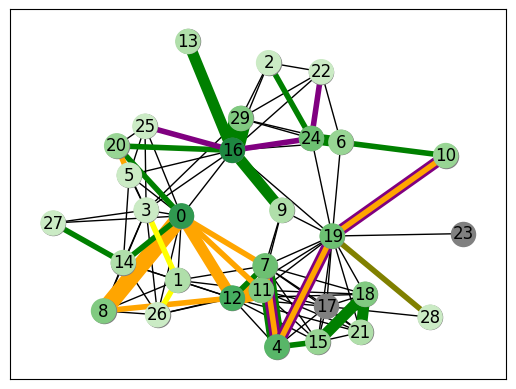

Population   500, best fitness function:            49.375949, best lines stops count: Counter({2: 10, 4: 5, 3: 2, 5: 2, 8: 1})no of lines: 20


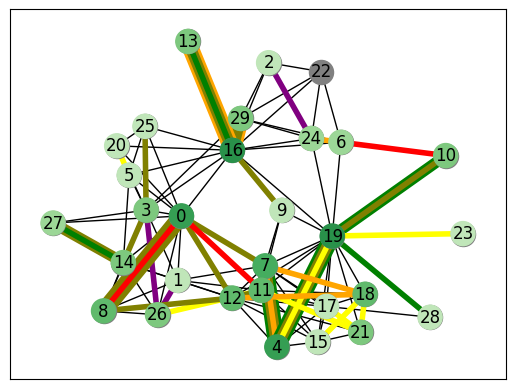

Population   750, best fitness function:            52.851756, best lines stops count: Counter({2: 11, 4: 6, 3: 3, 5: 2, 1: 1, 7: 1})no of lines: 24


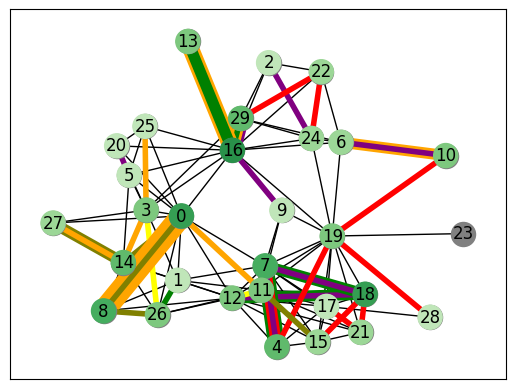

Population  1000, best fitness function:            54.503923, best lines stops count: Counter({2: 9, 4: 6, 3: 3, 5: 2, 1: 1, 8: 1})no of lines: 22


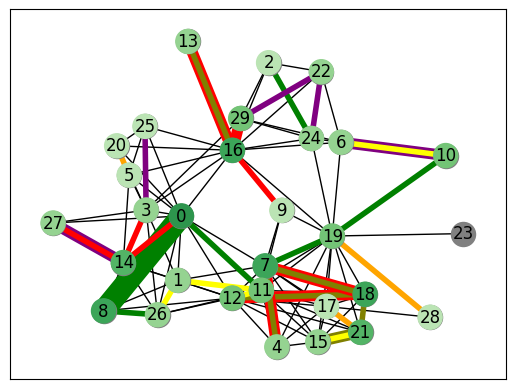

In [27]:
line_mutator = LineMutator(G, best_paths)
genotype_mutator = GenotypeMutator(G, best_paths)
genotype_crosser = GenotypeCrosser(best_paths)

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 5
    ),
    new_generation_function=lambda population, graph: new_generation_random(
        population,
        N_IN_POPULATION,
        line_mutator,
        genotype_mutator,
        genotype_crosser,
    ),
)

sim_engine.run(1000, 250, report_show=True)

In [33]:
from fitness import get_bus_stops_points

# retrive best organism from last generation
org = sim_engine.latest_generation[0]

print(get_bus_stops_points(org, G))

for line in org.lines:
    print(line)

[ 4.58462165  0.23168038  1.09027902  2.48740193  4.32420559  0.25484036
  2.51691907  3.92633197  2.36779404  2.24552316  4.07634943  1.99658657
  3.68011628 17.4233853   3.38129251  3.57825339  0.19940981  0.31517748
  1.8059938   0.          0.75505538  3.90244132  0.02121439  0.5433077
  2.95506263  1.43626075  2.00456235  2.72378133  0.16662128  3.94669659]
[12, 18, 4, 4]
[8, 0, 0, 8, 11]
[23]
[6, 10]
[28, 19]
[15, 15, 21, 18]
[9, 29, 29, 29, 29, 13, 13, 13]
[2, 2, 24, 24]
[6, 10]
[14, 27]
[21, 17]
[16, 13, 13, 13, 13]
[27, 14, 3]
[10, 7, 7, 7]
[12, 11, 1, 26]
[3, 25]
[20, 5]
[12, 18, 7, 4]
[14, 0]
[26, 8, 0]
[21, 15]
[24, 22, 29]


Population     0, best fitness function:          -132.151484, best lines stops count: Counter({12: 2, 15: 2, 17: 1, 6: 1, 16: 1, 4: 1, 18: 1, 11: 1})no of lines: 10


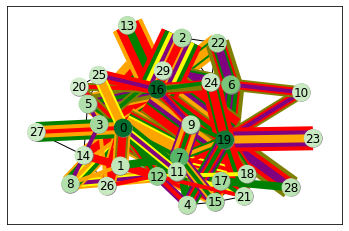

Population   100, best fitness function:            34.899971, best lines stops count: Counter({2: 9, 4: 5, 3: 4})no of lines: 18


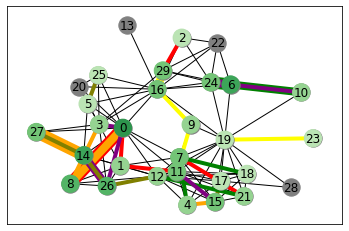

Population   200, best fitness function:            38.616836, best lines stops count: Counter({4: 4, 3: 4, 2: 3, 6: 1, 5: 1, 11: 1})no of lines: 14


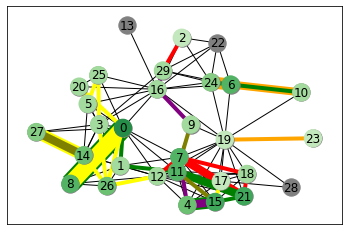

Population   300, best fitness function:            40.174088, best lines stops count: Counter({3: 4, 2: 4, 5: 2, 7: 2, 4: 1, 8: 1, 6: 1})no of lines: 15


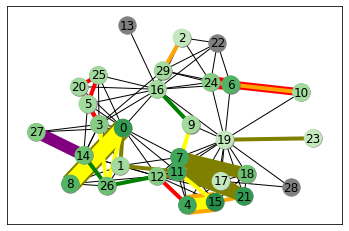

Population   400, best fitness function:            41.143007, best lines stops count: Counter({3: 3, 2: 3, 5: 2, 12: 1, 7: 1, 4: 1, 10: 1, 6: 1})no of lines: 13


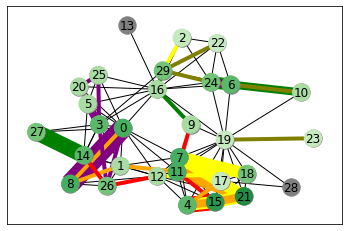

Population   500, best fitness function:            41.443791, best lines stops count: Counter({4: 2, 3: 2, 6: 2, 12: 1, 7: 1, 10: 1, 5: 1, 2: 1})no of lines: 11


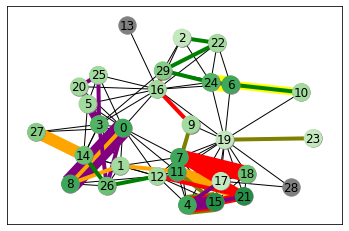

Population   600, best fitness function:            41.538277, best lines stops count: Counter({3: 5, 4: 3, 12: 2, 10: 1, 2: 1})no of lines: 12


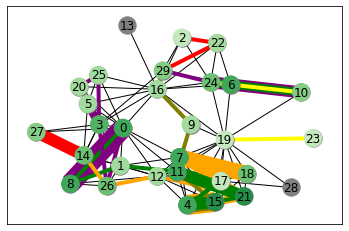

Population   700, best fitness function:            41.615634, best lines stops count: Counter({3: 4, 12: 3, 4: 2, 6: 1, 2: 1})no of lines: 11


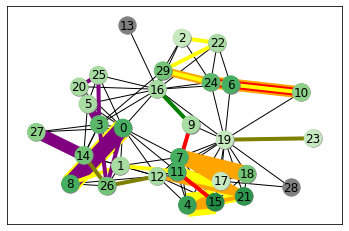

Population   800, best fitness function:            41.615634, best lines stops count: Counter({3: 4, 12: 3, 4: 2, 6: 1, 2: 1})no of lines: 11


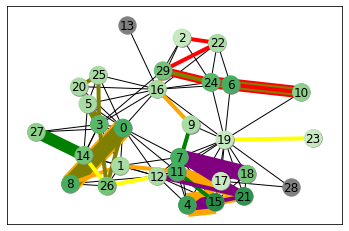

Population   900, best fitness function:            41.720338, best lines stops count: Counter({3: 4, 4: 2, 6: 1, 12: 1, 2: 1, 7: 1, 18: 1})no of lines: 11


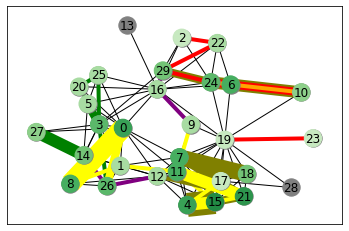

Population  1000, best fitness function:            41.963067, best lines stops count: Counter({3: 3, 4: 2, 6: 1, 12: 1, 2: 1, 8: 1, 1: 1, 10: 1, 11: 1})no of lines: 12


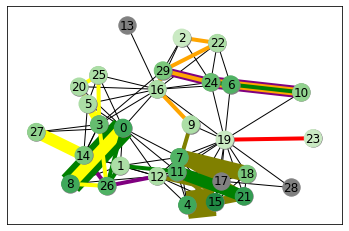

[-132.15148426982645,
 -26.685186507718477,
 -4.723385001970623,
 -0.8858520495467346,
 3.2037256392254605,
 3.2037256392254605,
 6.131674972712265,
 7.5554519876353865,
 8.57009358148595,
 8.967789983368853,
 9.532099343607328,
 11.90247648025741,
 13.09208066583302,
 13.804622337792676,
 16.18738427300664,
 19.295684011968078,
 19.295684011968078,
 19.295684011968078,
 19.47729710490502,
 20.398320707551186,
 20.398320707551186,
 20.940523604368543,
 21.8405518875019,
 22.253511146741683,
 22.351570034972255,
 23.11235547822607,
 23.11235547822607,
 23.532257534832915,
 23.573044693646906,
 23.83260953748234,
 24.11966737412894,
 24.645093844913056,
 25.29509219161627,
 25.61685656145363,
 25.61685656145363,
 25.61685656145363,
 25.699199339553083,
 26.359080317891973,
 26.359080317891973,
 26.549057574113284,
 27.332861065433505,
 27.332861065433505,
 27.550535906691668,
 27.645784065800505,
 27.975988012378345,
 28.01948514730097,
 28.321892007410927,
 28.405740978283603,
 28.40574

In [10]:
# best params simulation

from new_generation_function import NewGenerationRandomParams
from src.new_generation.Sanitizers import BasicSanitizer

all_stops = list(G.nodes)
line_mutator = LineMutator(G, all_stops, best_paths)
genotype_mutator = GenotypeMutator(G, best_paths)
genotype_crosser = GenotypeCrosser(G, best_paths)
sanitizer = BasicSanitizer(best_paths)
params = NewGenerationRandomParams(
    0.1,
    0.1,
    0.25,
    0.5,
    0.25,
    0.5,
    0.5,
    0.5,
    0.75,
)

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 5
    ),
    new_generation_function=lambda population, graph: new_generation_random(
        population,
        N_IN_POPULATION,
        line_mutator,
        genotype_mutator,
        genotype_crosser,
        sanitizer,
        params,
    ),
    population_sanitizer=BasicSanitizer(best_paths),
)

sim_engine.run(1000, 100, report_show=True)